Name: Syed Mohamad Tawseeq          
ROll: 22CH10090

A) Compute HOG Features (7 Marks)

In [1]:
img_path = '/Users/tawseeq/Documents/IITKGP/4th Year/8th Sem/ADVANCED DIGITAL IMAGE PROCESSING AND COMPUTER VISION/Assignments/Assignment 1/pedestrian_detection_images/positive/person_298c.png'

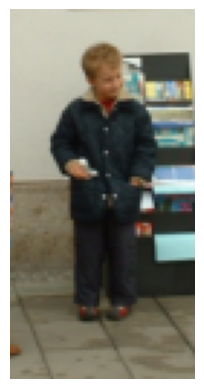

In [2]:
# from PIL import Image 
# img = Image.open(img_path)
# img.show(). # this opens a new window to display image , not in the output window on notebook
import matplotlib.pyplot as plt 
import matplotlib.image as imm 
img = imm.imread(img_path) 
plt.imshow(img) 
plt.axis("off") 
plt.show() 

In [16]:
import cv2 

image = cv2.imread(img_path)
print(image.shape)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(128, 64, 3)
(128, 64)


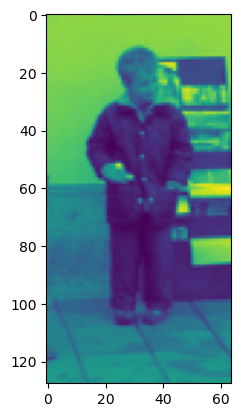

In [18]:
plt.imshow(gray_image)

In [36]:
sobelx = cv2.Sobel(gray_image, cv2.CV_32F,1,0,ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F,0,1,ksize=3)

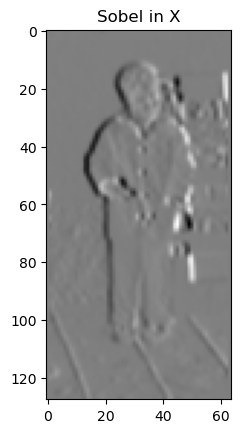

In [38]:
plt.title("Sobel in X")
plt.imshow(sobelx, cmap='gray')


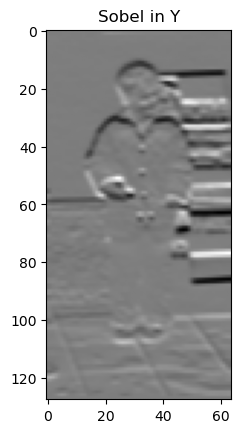

In [40]:
plt.title("Sobel in Y")
plt.imshow(sobely, cmap='gray')

In [43]:
print(sobelx.shape)
print(sobely.shape)

(128, 64)
(128, 64)


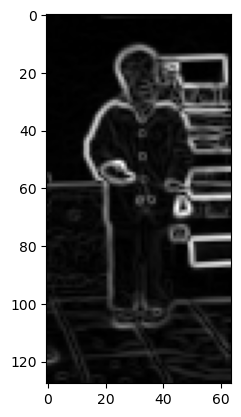

In [ ]:
import numpy as np 
mag = np.sqrt(sobelx**2 + sobely**2) #to get magnitude
plt.imshow(mag, cmap='gray')

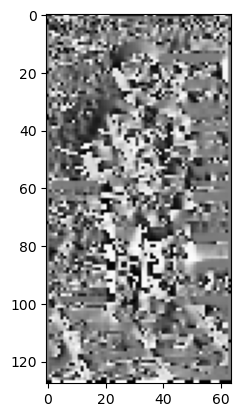

In [ ]:
theta_rad = np.arctan2(sobely, sobelx)
theta = np.degrees(theta_rad) #convert theta to degrees
for i in range(len(theta)):
    for j in range(len(theta[i])):
        if theta[i][j] < 0:
            theta[i][j] = theta[i][j] + 180     #as my theta can be in range 0 to 180 , we add 180 to negatives
plt.imshow(theta, cmap = 'gray')

In [68]:
theta

array([[  0.        ,   0.        , 180.        , ..., 180.        ,
          0.        ,   0.        ],
       [ 90.        ,  59.03624347,  81.86989765, ..., 135.        ,
        161.56505118,  90.        ],
       [  0.        , 153.43494882,  78.69006753, ..., 120.96375653,
         83.65980825,  90.        ],
       ...,
       [ 90.        , 180.        ,  18.43494882, ...,  90.        ,
         94.60009567,  90.        ],
       [ 90.        ,  90.        , 168.69006753, ...,  88.56790382,
         90.65854318,  90.        ],
       [  0.        ,   0.        , 180.        , ...,   0.        ,
          0.        ,   0.        ]], shape=(128, 64))

<BarContainer object of 9 artists>

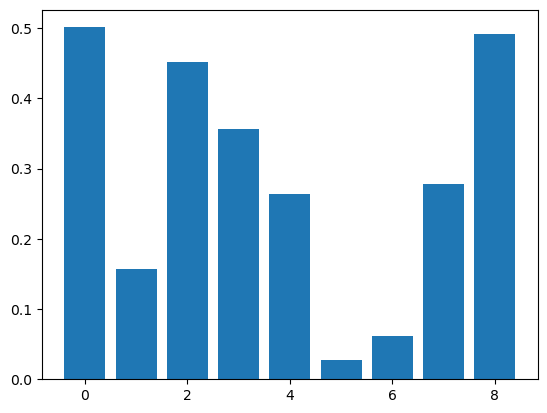

In [ ]:
num_bins = 9 #of histogram
hist = np.zeros(num_bins)
degree_each_bin = 180 // num_bins   #simple division

for i in range(8): #8 because we will first test for just one block 8 by 8
    for j in range(8):
        magnitude = mag[i][j] #get magnitude
        angle = theta[i][j] #get angle
        bin_idx = int(angle / degree_each_bin) #put into particular index

        if bin_idx == num_bins: #case to check if angle in 180
            bin_idx = num_bins - 1

        hist[bin_idx] += magnitude
        
eps = 1e-6
hist = hist / (np.linalg.norm(hist) + eps)  # normalization required
       
#we need 9 bins so 20 degree in each x
x_axis = np.arange(9)
plt.bar(x_axis, hist)

In [ ]:
# we do same above thing but in loop over all blocks
H, W = gray_image.shape
one_block_size = 8 
x_blocks = W // one_block_size
y_blocks = H // one_block_size
hog_features = []

for i in range(0, W, one_block_size):
    for j in range(0, H, one_block_size):
        num_bins = 9
        hist = np.zeros(num_bins)
        degree_each_bin = 180 // num_bins

        for k in range(i, i+8):
            for l in range(j, j+8):
                magnitude = mag[l][k]
                angle = theta[l][k]
                bin_idx = int(angle / degree_each_bin)

                if bin_idx == num_bins:
                    bin_idx = num_bins - 1

                hist[bin_idx] += magnitude
                
        eps = 1e-6
        hist = hist / (np.linalg.norm(hist) + eps)  # normalization required
        hog_features.append(hist)


In [92]:
print(len(hog_features))
print(len(hog_features[0]))

128
9


Writing in function

In [ ]:
# writing this in fucntional form.  I copy pasted blocks
def hog_features(img_path, sobel_kernal_size=3, block_size=8, num_bins=9):
    img = cv2.imread(img_path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale
    sobelx = cv2.Sobel(gray_image, cv2.CV_32F,1,0,ksize=sobel_kernal_size) #get x grads
    sobely = cv2.Sobel(gray_image, cv2.CV_64F,0,1,ksize=sobel_kernal_size) #get y grads
    mag = np.sqrt(sobelx**2 + sobely**2) #get magnitude
    theta_rad = np.arctan2(sobely, sobelx) #get theta
    theta = np.degrees(theta_rad) #convert to degree and add 180 to negatiuves
    for i in range(len(theta)):
        for j in range(len(theta[i])):
            if theta[i][j] < 0:
                theta[i][j] = theta[i][j] + 180
    H, W = gray_image.shape

    x_blocks = W // block_size
    y_blocks = H // block_size
    hog_features = []
#this has been explainded in above comments
    for i in range(0, W, block_size):
        for j in range(0, H, block_size):
            hist = np.zeros(num_bins)
            degree_each_bin = 180 // num_bins

            for k in range(i, i+block_size):
                for l in range(j, j+block_size):
                    magnitude = mag[l][k]
                    angle = theta[l][k]
                    bin_idx = int(angle / degree_each_bin)

                    if bin_idx == num_bins:
                        bin_idx = num_bins - 1

                    hist[bin_idx] += magnitude
                    
            eps = 1e-6
            hist = hist / (np.linalg.norm(hist) + eps)  # normalization required
            hog_features.append(hist)
    return hog_features, gray_image.shape

    


In [ ]:
img_path = "Assignment 1/pedestrian_detection_images/positive/person_266a.png"
features, shape = hog_features(img_path) #sample image to check
features

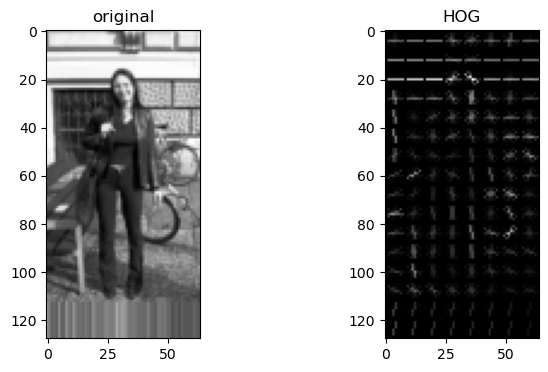

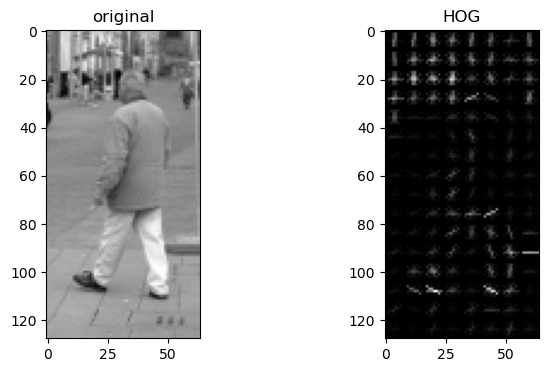

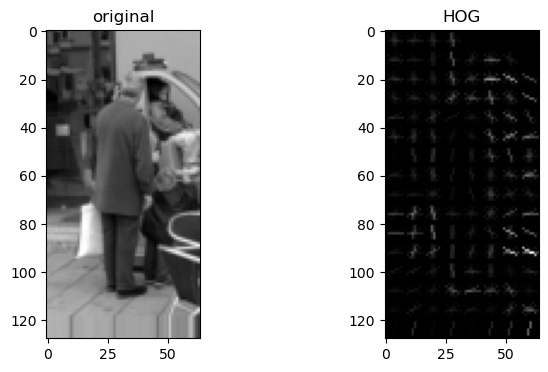

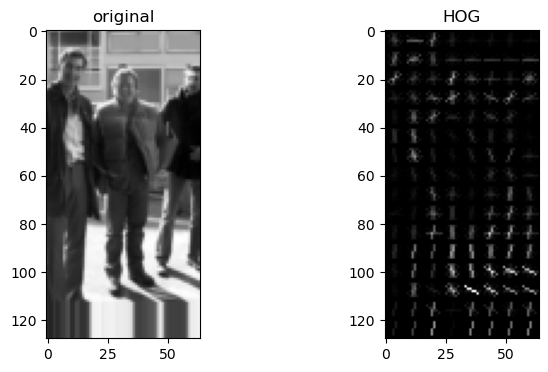

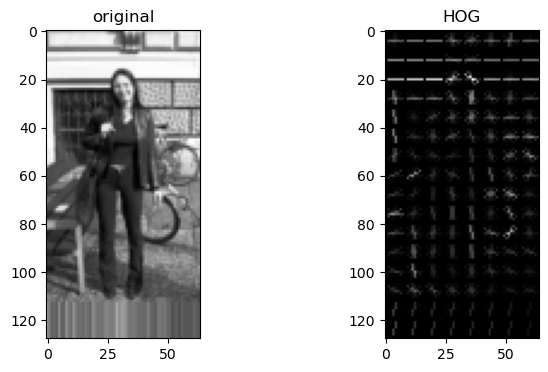

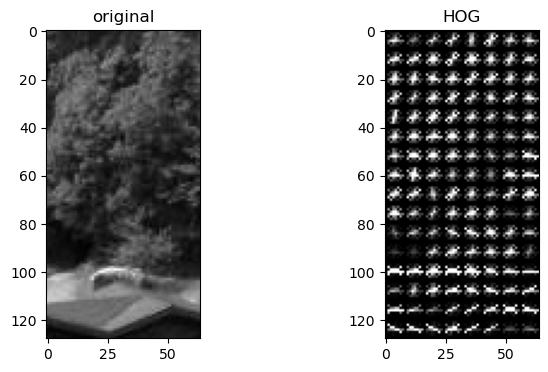

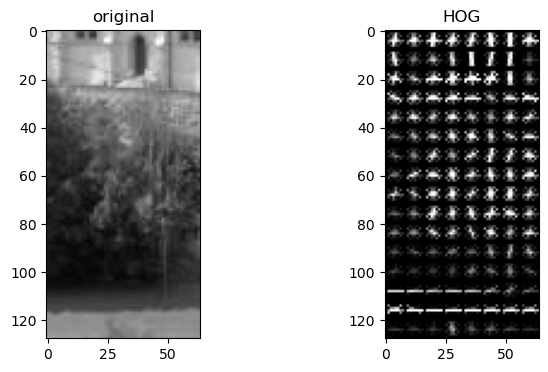

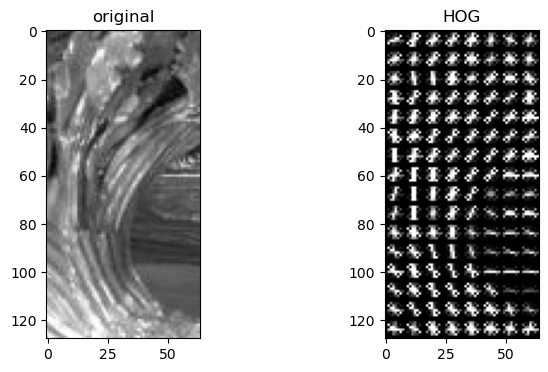

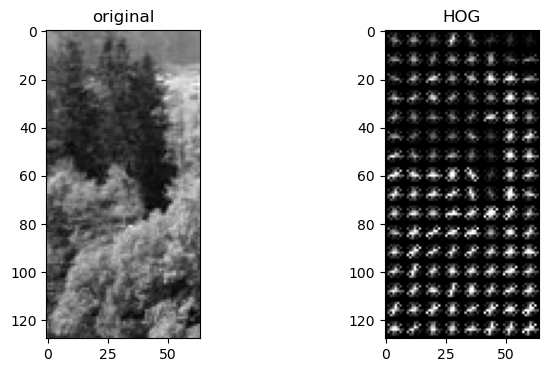

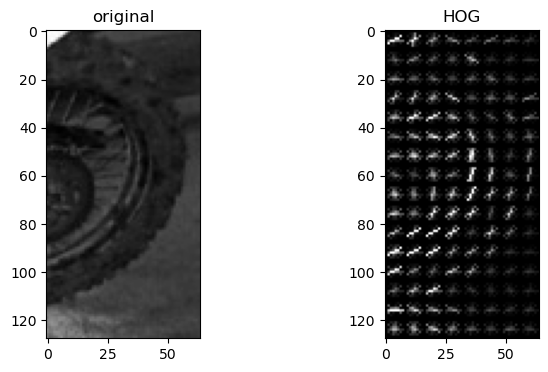

In [ ]:
# I used sklearn hog features for this part of the task , I can also use my function to hog features but I do not know how to show the computed hog features in image
from skimage.feature import hog
from skimage import exposure
def hog_features_and_image_visualized(img_path):
    img = plt.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog( #this is the way of calling this fucntion
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(1, 1),
        visualize=True,
        feature_vector=True
    )
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title("HOG")
    plt.show()
#choosing 5 pos and 5 neg examples
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/positive/person_266a.png")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/positive/person_286b.png")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/positive/person_296a.png")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/positive/person_269a.png")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/positive/person_266a.png")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/negative/375_12.jpg")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/negative/375_13.jpg")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/negative/378_0.jpg")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/negative/375_15.jpg")
hog_features_and_image_visualized("Assignment 1/pedestrian_detection_images/negative/376_8.jpg")


(b) Pedestrian Detection (8 Marks)

In [ ]:
import os

def load_images(fold_path, label): #a simple fucntion to load image
    images = []
    labels = []
    for filename in os.listdir(fold_path): # go through each file and read it
        img_path = os.path.join(fold_path, filename)
        img = cv2.imread(img_path)
        images.append(img)
        labels.append(label)
    return images, labels
base_path = "Assignment 1/pedestrian_detection_images"
postv_images, postv_labels = load_images(os.path.join(base_path, "positive"), label=1)
neg_images, neg_labels = load_images(os.path.join(base_path, "negative"), label=0)
#now add both positive and negs
X_images = postv_images + neg_images
y_labels = postv_labels + neg_labels

arr1 = np.array(X_images)
print(arr1.shape)
arr2 = np.array(y_labels)
print(arr2.shape)


(800, 128, 64, 3)
(800,)


In [ ]:
# extract hog featrures using skimage library
def extract_hog_feats(images):
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hog_vec = hog(
            gray,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            feature_vector=True
        )
        features.append(hog_vec)
    return np.array(features)

X = extract_hog_feats(X_images)
y = np.array(y_labels)

print(X.shape) 
print(y.shape)
#now we have x, y we simply train it

(800, 3780)
(800,)


In [146]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X, y)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [ ]:
test_images = []
test_filenames = []
test_folder = os.path.join(base_path, "test")
for filename in os.listdir(test_folder): #make the test dataset just like we did it for training
    path = os.path.join(test_folder, filename)
    img = cv2.imread(path)
    test_images.append(img)
    test_filenames.append(filename)

In [152]:
X_test = extract_hog_feats(test_images)
predictions = svm.predict(X_test)

In [ ]:
for name_of_file, pred in zip(test_filenames, predictions): # check for the sample of 10 test images given
    if pred == 1:
        print(f"{name_of_file}:  Pedestrian")
    else:
        print(f"{name_of_file} :No pedestrian")


00000089a.png :No pedestrian
00000070a.png :No pedestrian
crop001560c.png:  Pedestrian
crop001560e.png :No pedestrian
crop001560d.png:  Pedestrian
00000083a.png :No pedestrian
crop001572a.png:  Pedestrian
crop001572b.png:  Pedestrian
00000090a.png :No pedestrian
00000091a.png :No pedestrian
